# Internet & GDP
## 4.3 INTERNET

In [8]:
install.packages("tidyverse")
install.packages("gridExtra")
install.packages("nortest")

require(tidyverse)
require(gridExtra)
require("nortest")

options(repr.plot.width=20, repr.plot.height=9)

    internet <- read.table("/Users/jmanderson/statistics/02_intro-to-regression/ARM by Iain - Exercises/data/internet.csv", 
                           sep=",", header = T, stringsAsFactors = F)


The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpoW64sQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpoW64sQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpoW64sQ/downloaded_packages


,Country,Gdp,Int
,<chr>,<dbl>,<dbl>
1,Afghanistan,1.0,3.4
2,Albania,7.4,43.4
3,Algeria,7.4,13.4
4,Andorra,46.7,79.1
5,Angola,8.7,4.5
6,Anguilla,12.2,24.5


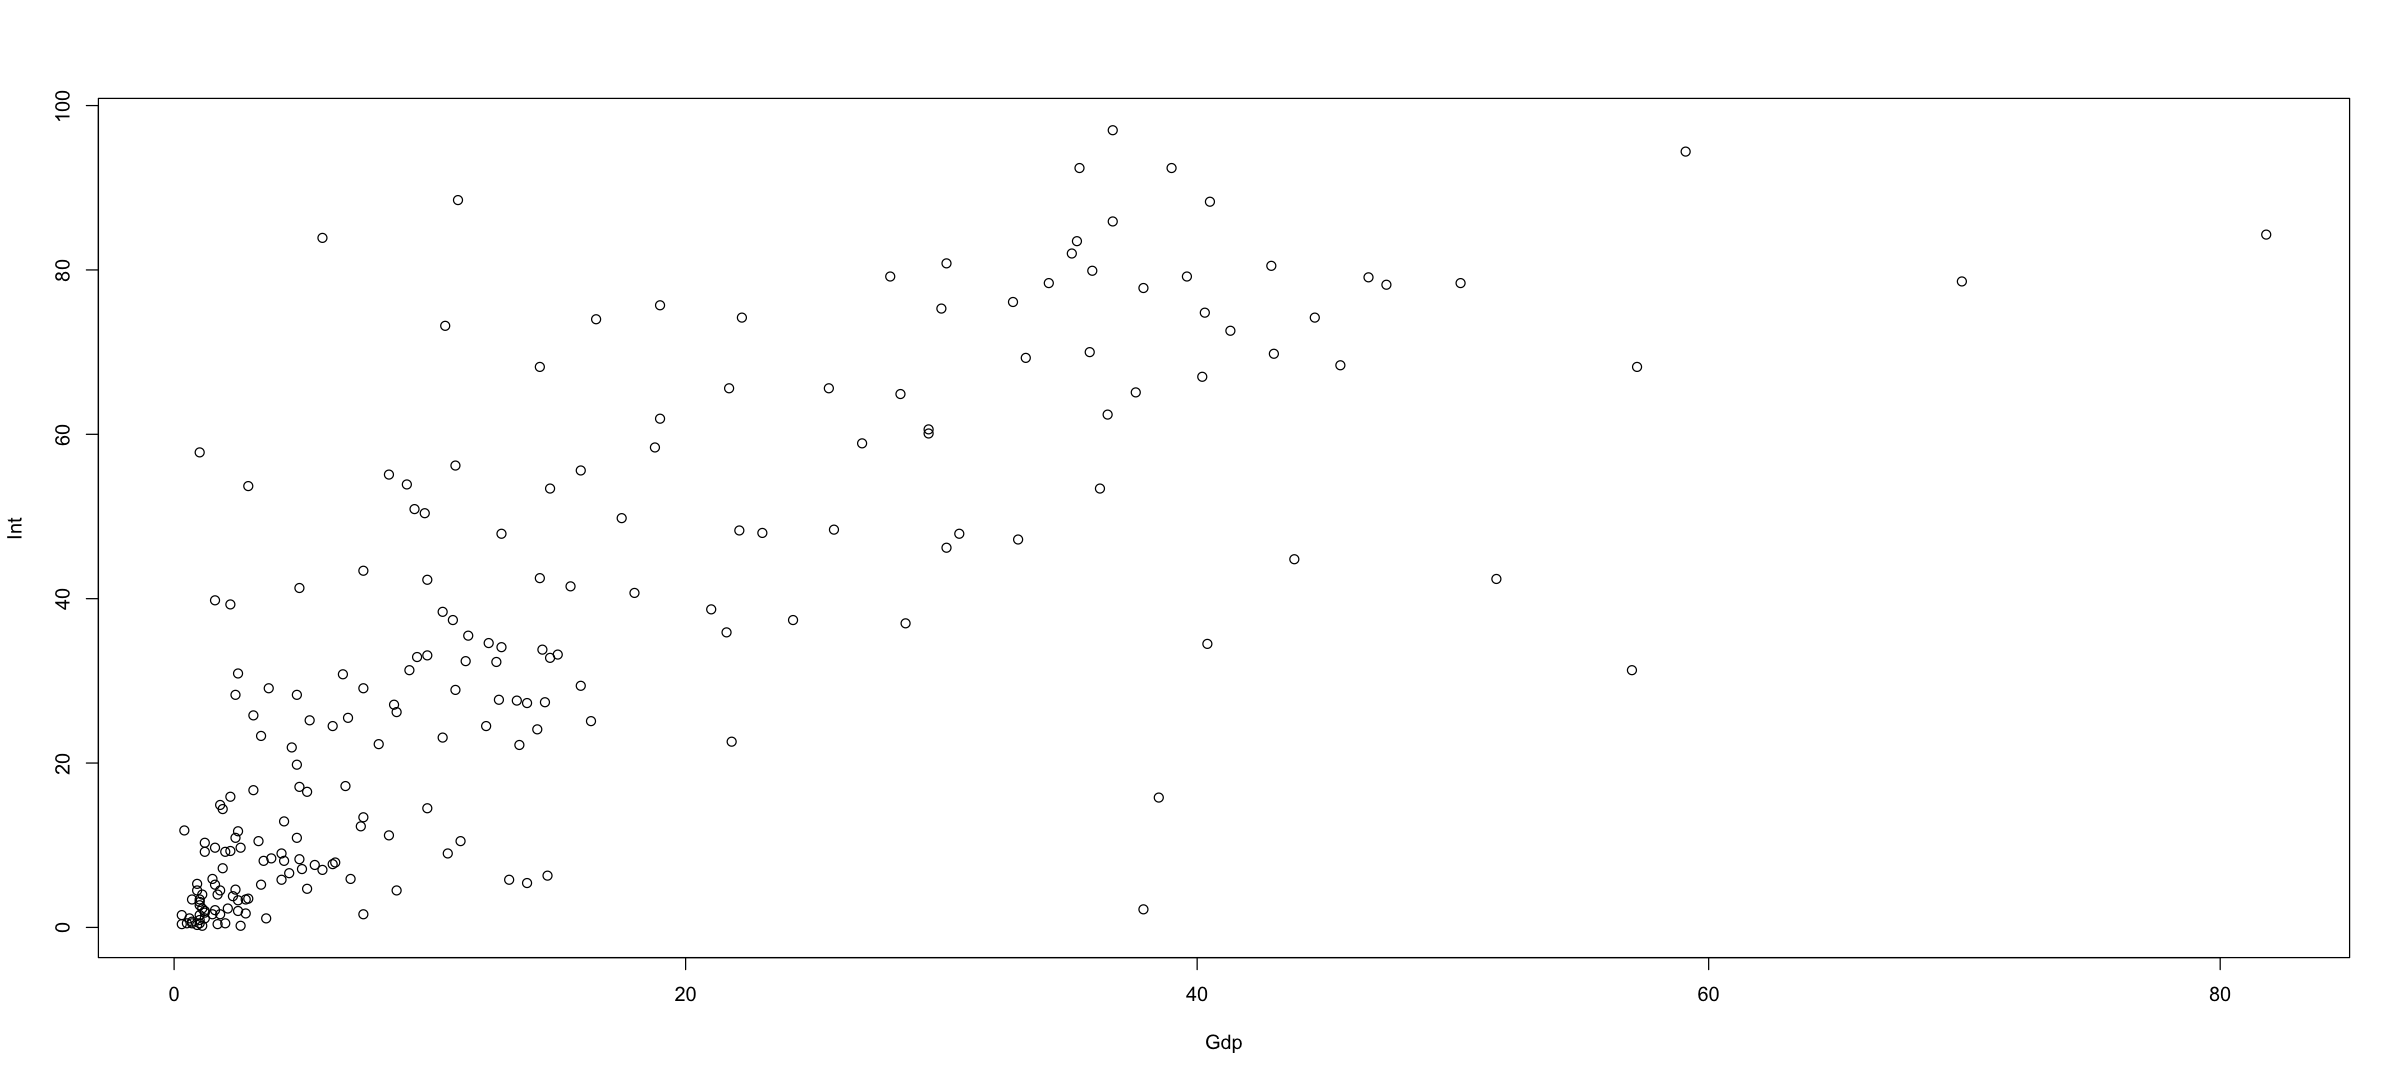

In [10]:
head(internet)
plot(Int~Gdp, internet)

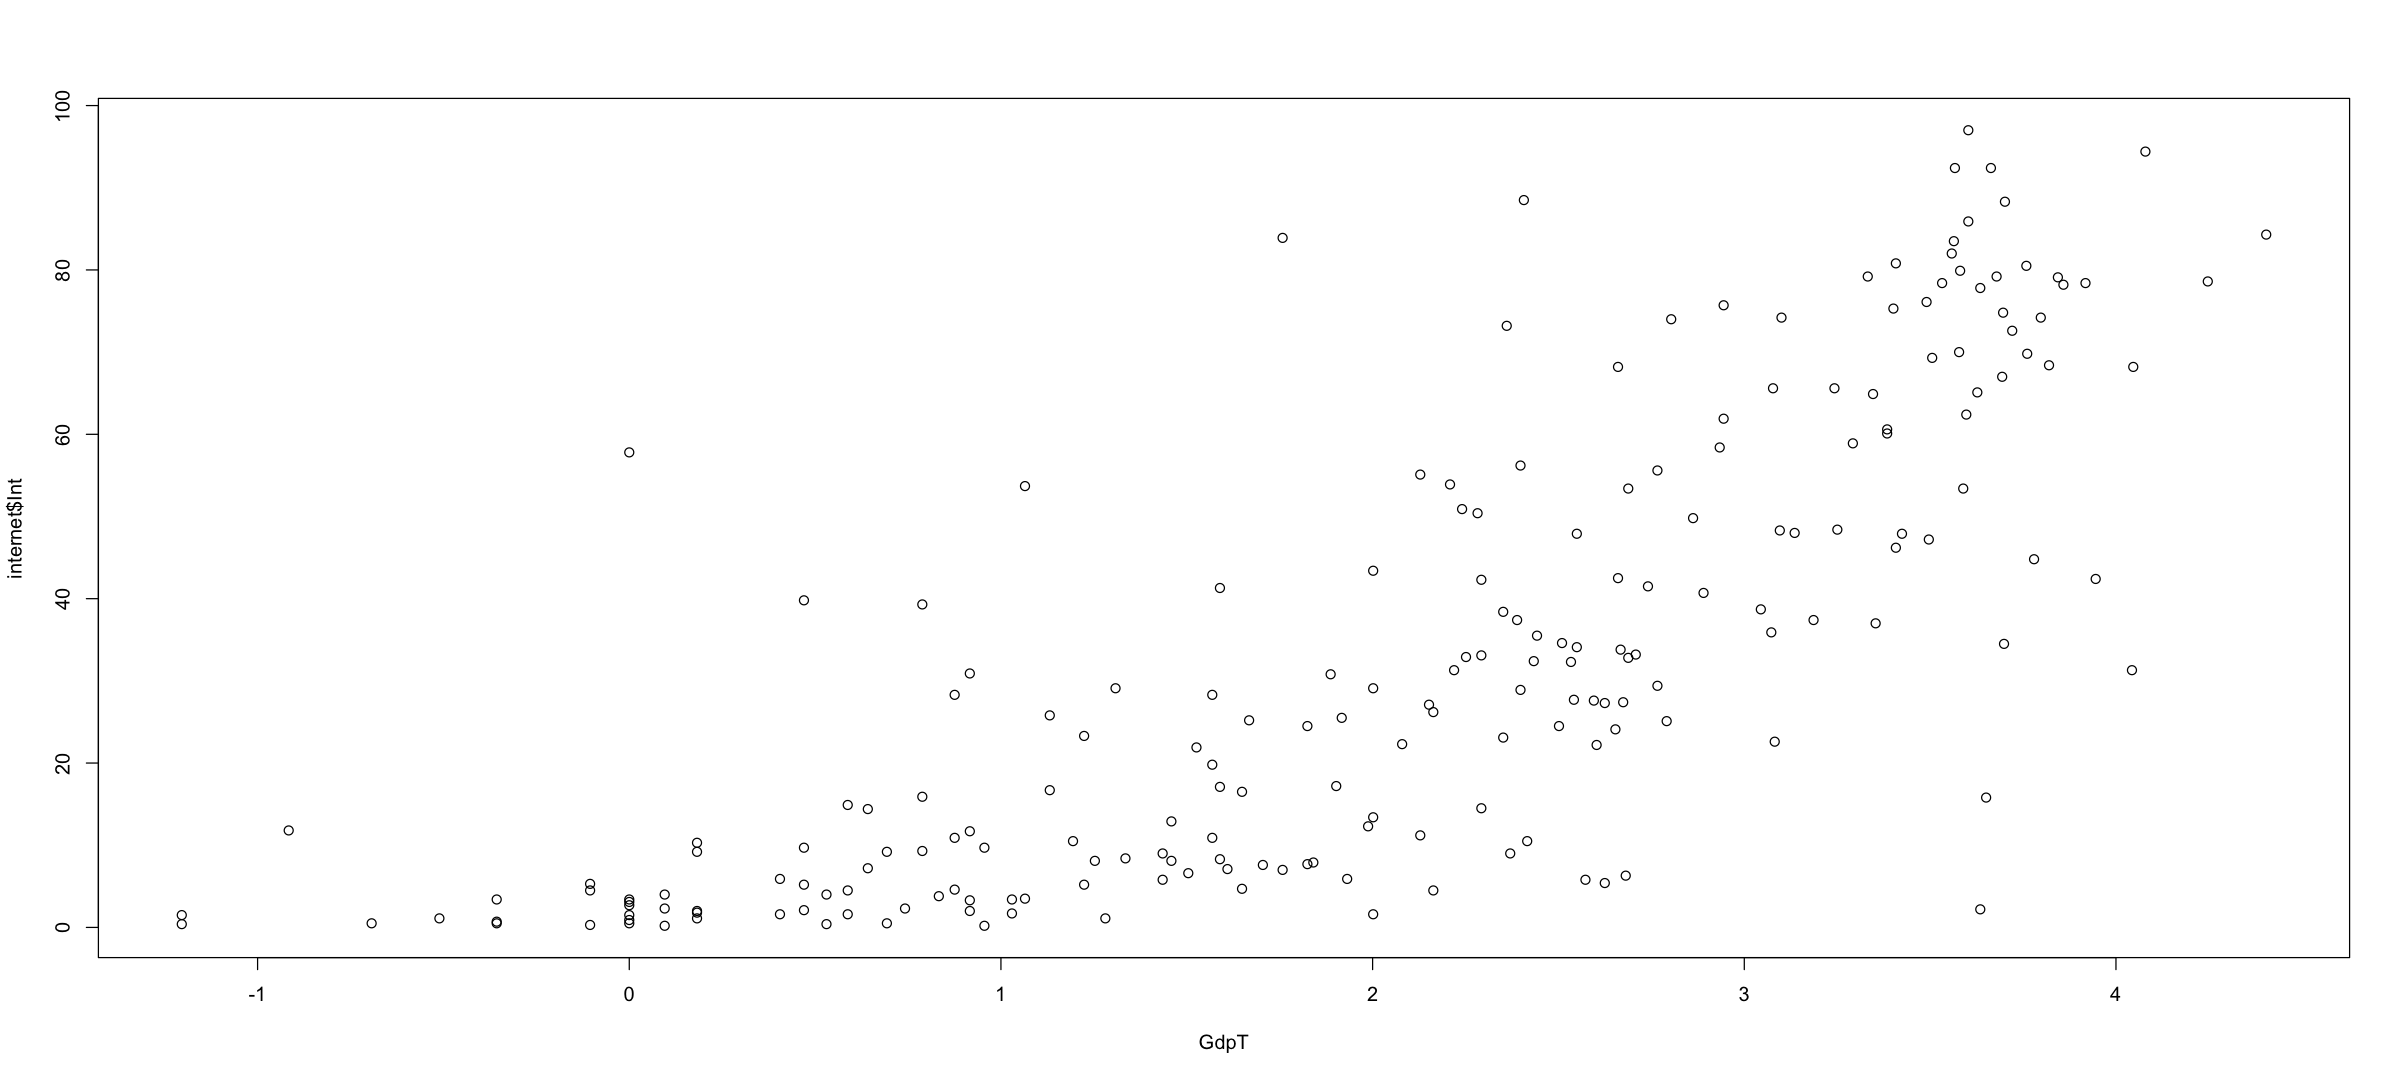

In [52]:
IntT <- internet$Int^0.5
GdpT <- log(internet$Gdp)

plot(internet$Int~GdpT, internet)

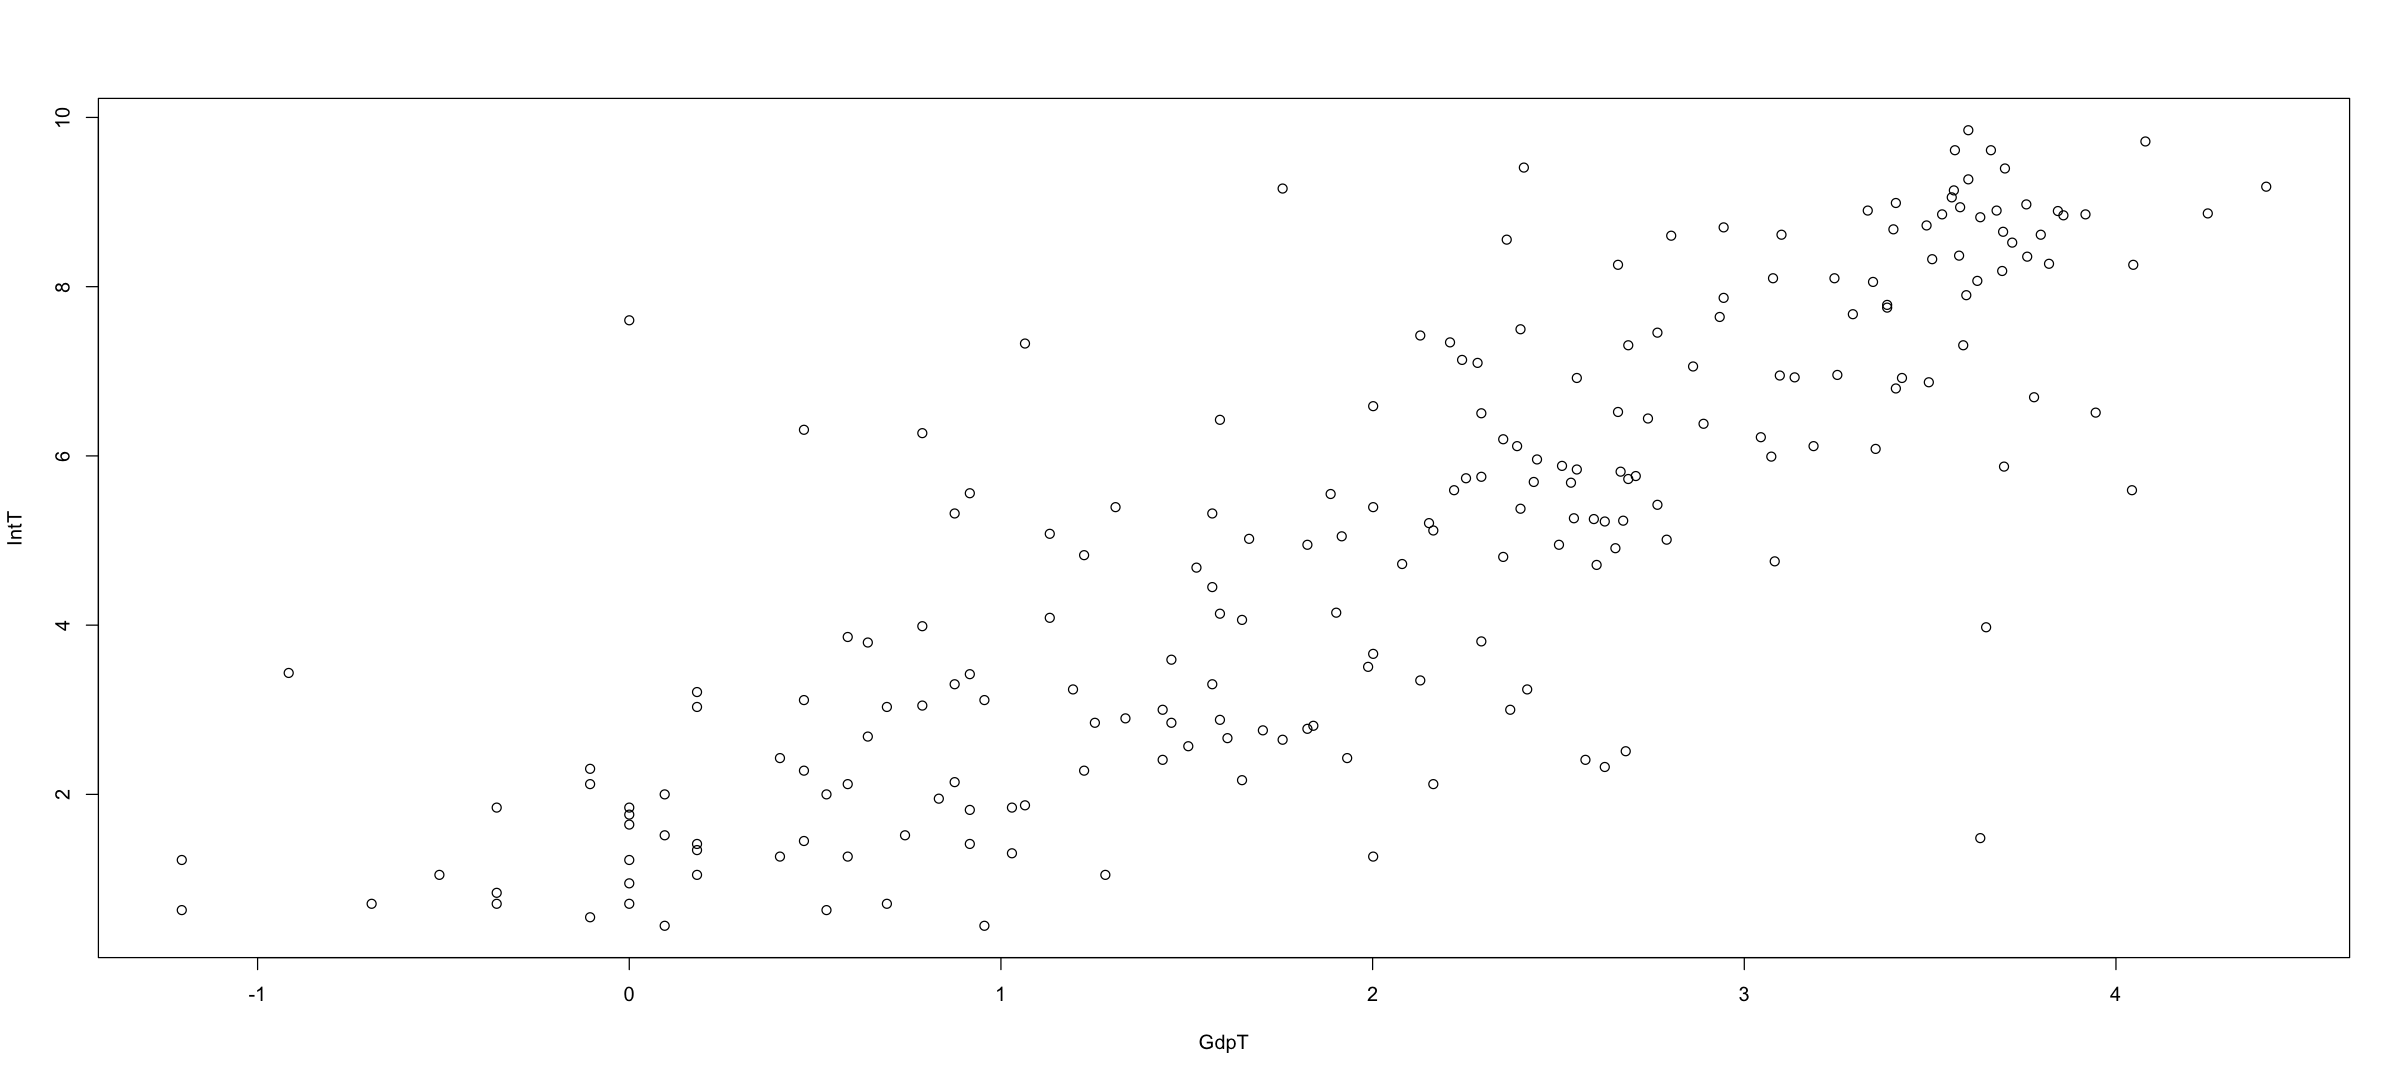

In [53]:
plot(IntT~GdpT, internet)

From a visual analysis I would choose the second set of transformations for the following reasons:
- Improved Homoscedasticity
- Outliers seems to be slighly closer to most of the data.

Now lets fit the models and do a formal comparison.

In [51]:
lmInternet_L <- lm(internet$Int~GdpT)
lm_internet_QL <- lm(IntT~GdpT)

summary(lmInternet_L)
summary(lm_internet_QL)


Call:
lm(formula = internet$Int ~ GdpT)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.189 -11.752  -1.338  10.854  58.931 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.1307     2.2657  -0.499    0.618    
GdpT         16.6494     0.9431  17.653   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.78 on 210 degrees of freedom
Multiple R-squared:  0.5974,	Adjusted R-squared:  0.5955 
F-statistic: 311.6 on 1 and 210 DF,  p-value: < 2.2e-16



Call:
lm(formula = IntT ~ GdpT)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2521 -0.9414  0.1061  1.0225  5.9617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.64095    0.20294   8.086 4.86e-14 ***
GdpT         1.67661    0.08448  19.847  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.592 on 210 degrees of freedom
Multiple R-squared:  0.6523,	Adjusted R-squared:  0.6506 
F-statistic: 393.9 on 1 and 210 DF,  p-value: < 2.2e-16


We cannot compare S between models as one is in original units and one transformed units. We can compare R2(+Adj R2), T-Test for b1. Both are improved in second model 

#### So now the exercise is suggesting we compare SQRT and LOG matching with both

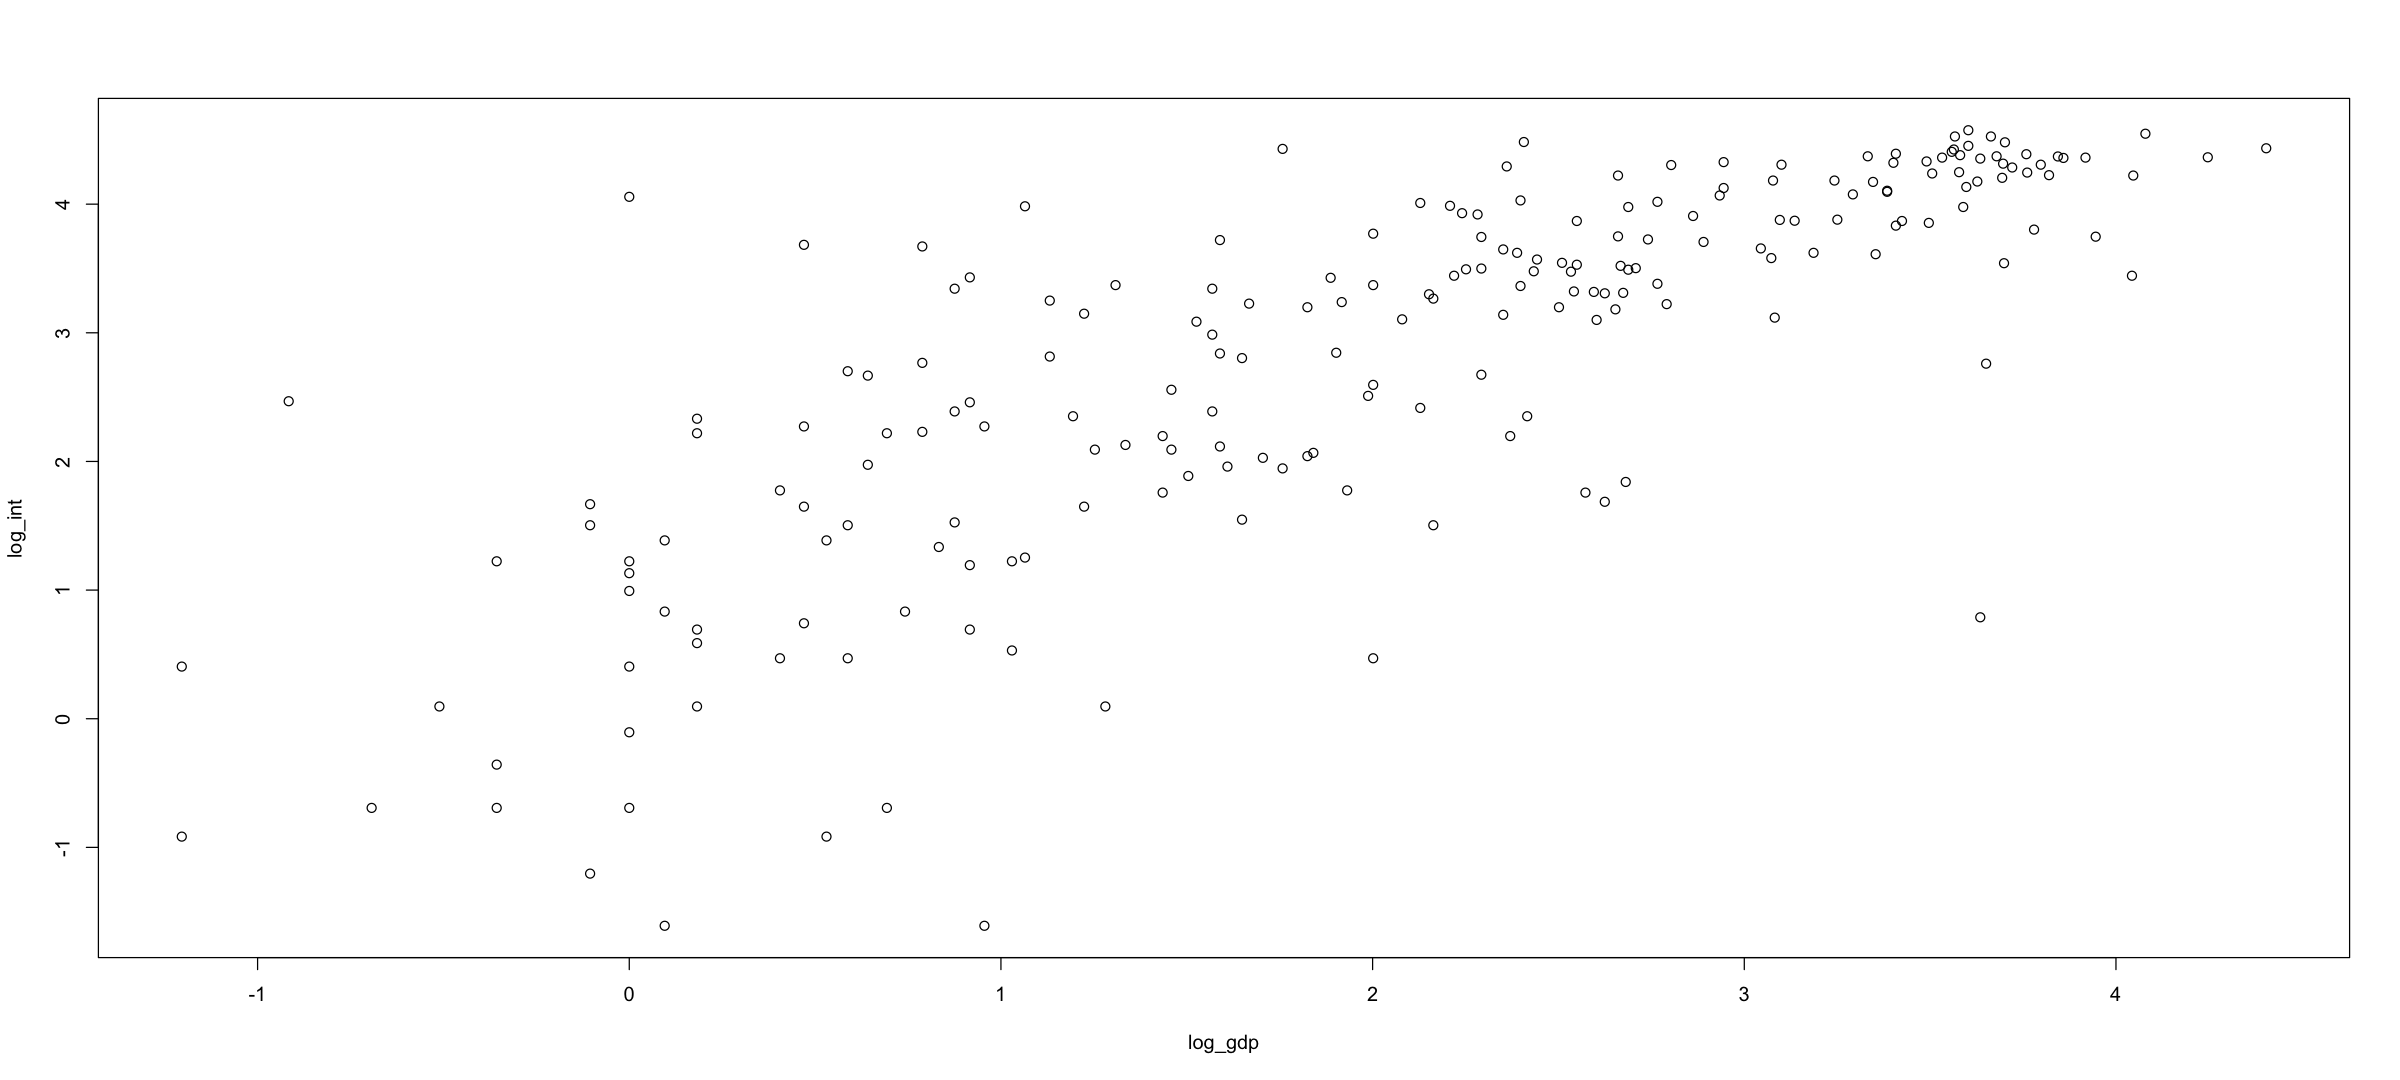

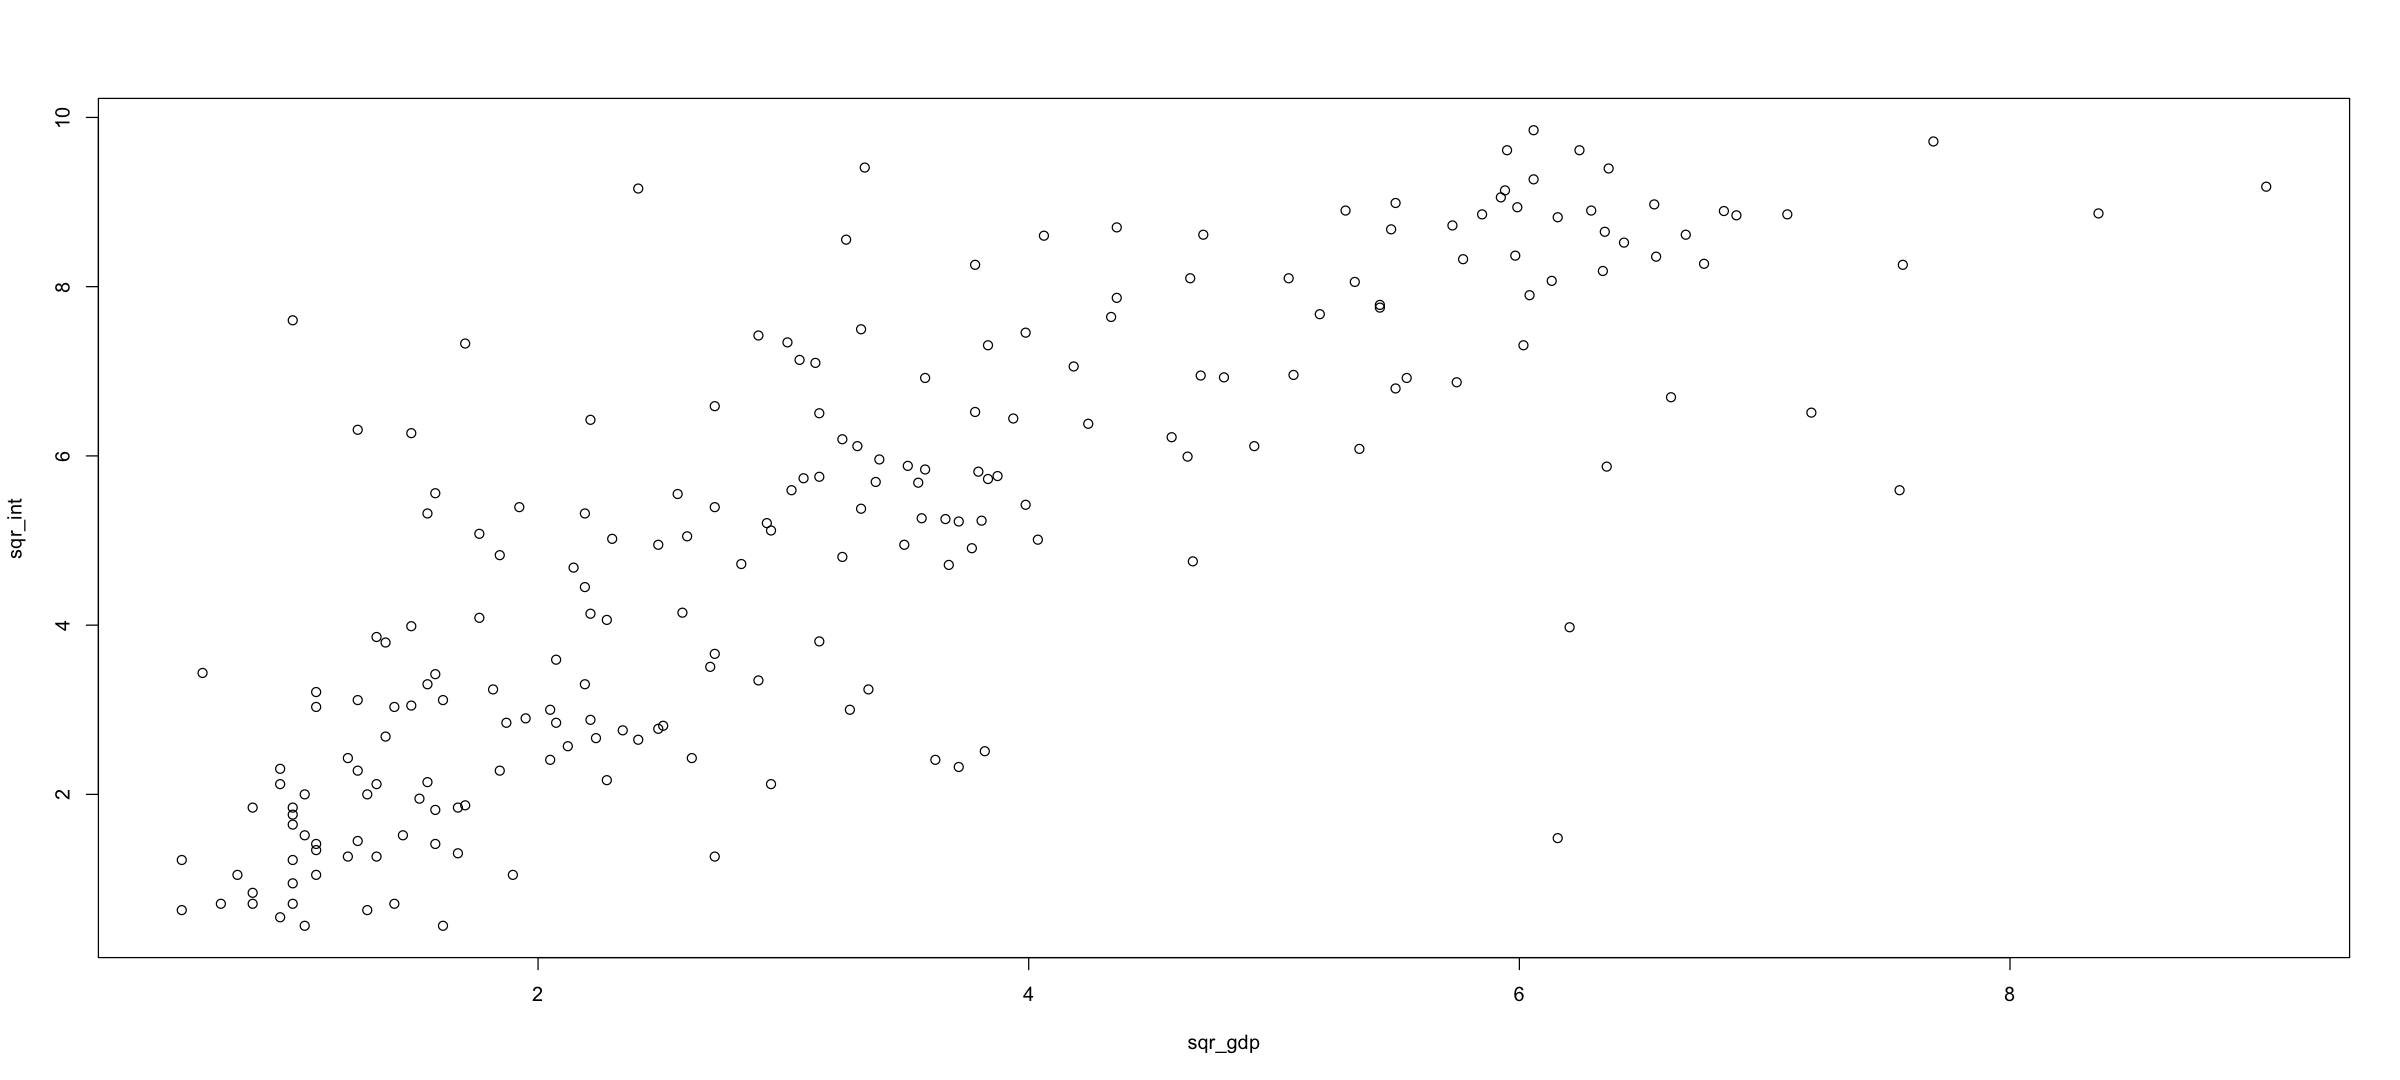

In [50]:
log_int <- log(internet$Int)
log_gdp <- log(internet$Gdp)

sqr_int <- sqrt(internet$Int)
sqr_gdp <- sqrt(internet$Gdp)

plot(log_int~log_gdp)
plot(sqr_int~sqr_gdp)

### Ok sp now we can see a clear competitor to our winning model above.. and thats to get the Square Root of both the reponse and input variable. 
Now we can fit a linear model to do a formal comparison.

In [56]:
lmInternet_SQRT <- lm(sqr_int~sqr_gdp)
summary(lmInternet_SQRT)


Call:
lm(formula = sqr_int ~ sqr_gdp)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6711 -1.1376 -0.0641  0.9871  5.1420 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.35970    0.22284   6.102 4.99e-09 ***
sqr_gdp      1.10369    0.05784  19.081  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.633 on 210 degrees of freedom
Multiple R-squared:  0.6342,	Adjusted R-squared:  0.6325 
F-statistic: 364.1 on 1 and 210 DF,  p-value: < 2.2e-16


*Its still got a smaller P-Value so I would probably go with my original model.*